# SENG 352 - 2023/2024 SPRING SEMESTER FINAL EXAM

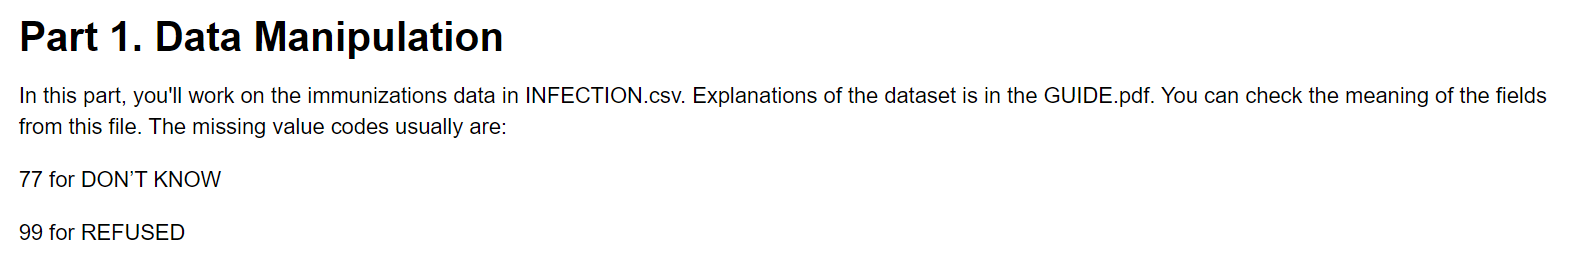

**QUESTION1(15 points):**

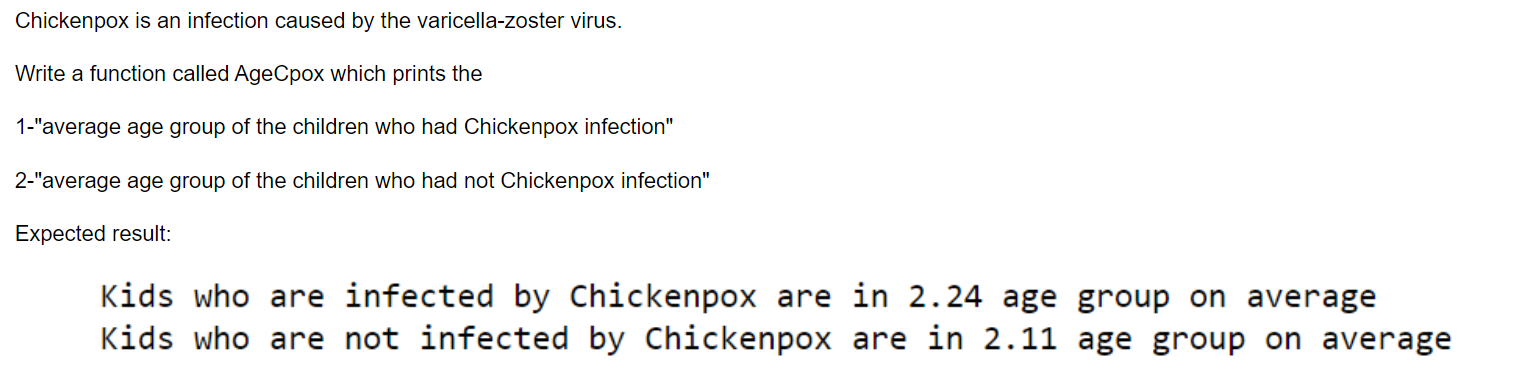

In [10]:
#Solution1 will be written in this cell
import pandas as pd


def AgeCpox(filePath):
    dataset=pd.read_csv(filePath)
    
    dataset.replace({77:pd.NA, 99:pd.NA}, inplace=True)
    dataset = dataset.dropna(subset=['HAD_CPOX', 'AGEGRP'])

    infected = dataset[dataset['HAD_CPOX'] == 1]
    notInfected = dataset[dataset['HAD_CPOX'] == 2]
    
    avgInfected= infected['AGEGRP'].mean()
    avgNotInfected=notInfected['AGEGRP'].mean()
    
    print(f"Kids who are infected by Chickenpox are in {avgInfected:.2f} age group on average")
    print(f"Kids who are not infected by Chickenpox are in {avgNotInfected:.2f} age group on average")

filePath='/Users/edakocaman/Desktop/3. Grade Spring Semester/SENG352/Final/INFECTION.csv' 
AgeCpox(filePath)

Kids who are infected by Chickenpox are in 2.24 age group on average
Kids who are not infected by Chickenpox are in 2.11 age group on average


**QUESTION 2(15 points):**
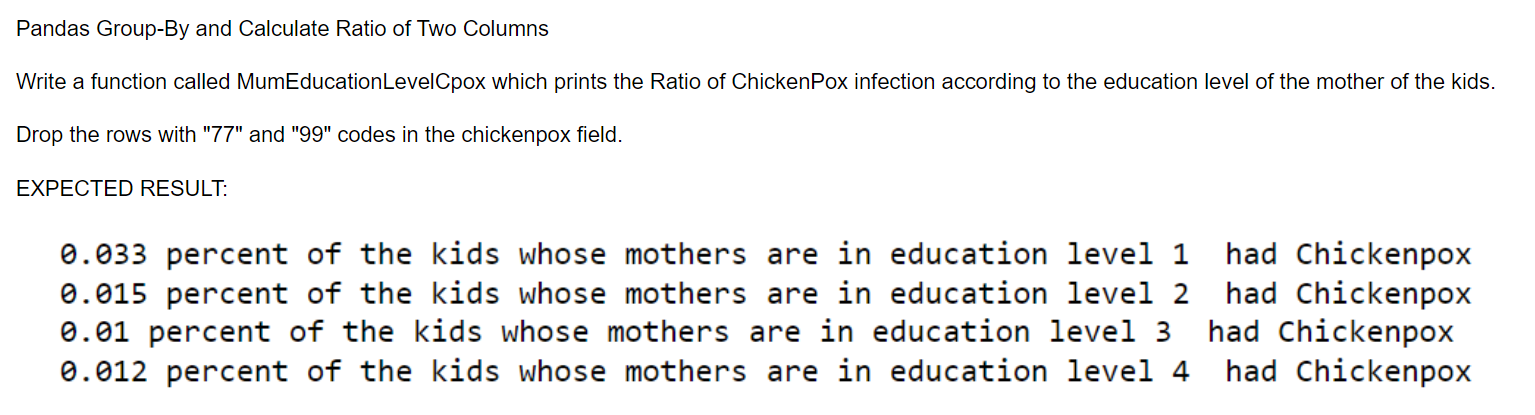

In [13]:
#Solution2 will be written in this cell

filePath='/Users/edakocaman/Desktop/3. Grade Spring Semester/SENG352/Final/INFECTION.csv' 

def MumEducationLevelCpox(filePath):
    dataset=pd.read_csv(filePath)

    dataset.replace({77:pd.NA, 99:pd.NA}, inplace=True)
    dataset = dataset.dropna(subset=['HAD_CPOX', 'EDUC1'])
    
    #group by education level
    grouped = dataset.groupby('EDUC1')
    
    #calc infection ratio for ecach group
    ratios = grouped.apply(lambda x: (x['HAD_CPOX'] == 1).sum() / len(x))
    
    for level, ratio in ratios.items():
        print(f"{ratio:.3f} percent of the kids whose mothers are in education level {int(level)} had Chickenpox")

MumEducationLevelCpox(filePath)

0.033 percent of the kids whose mothers are in education level 1 had Chickenpox
0.015 percent of the kids whose mothers are in education level 2 had Chickenpox
0.010 percent of the kids whose mothers are in education level 3 had Chickenpox
0.012 percent of the kids whose mothers are in education level 4 had Chickenpox


**QUESTION 3(15 points):**

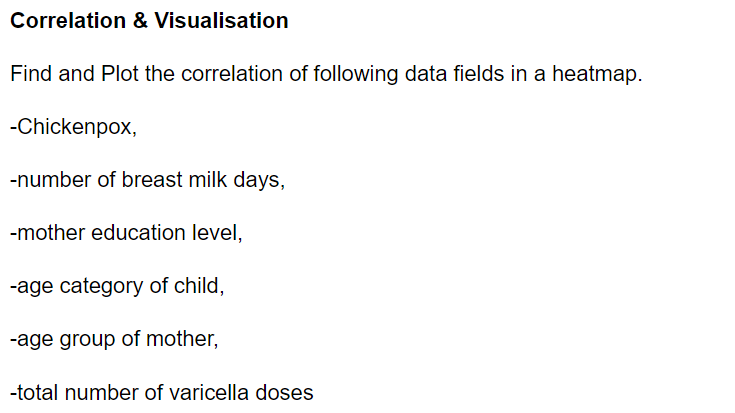


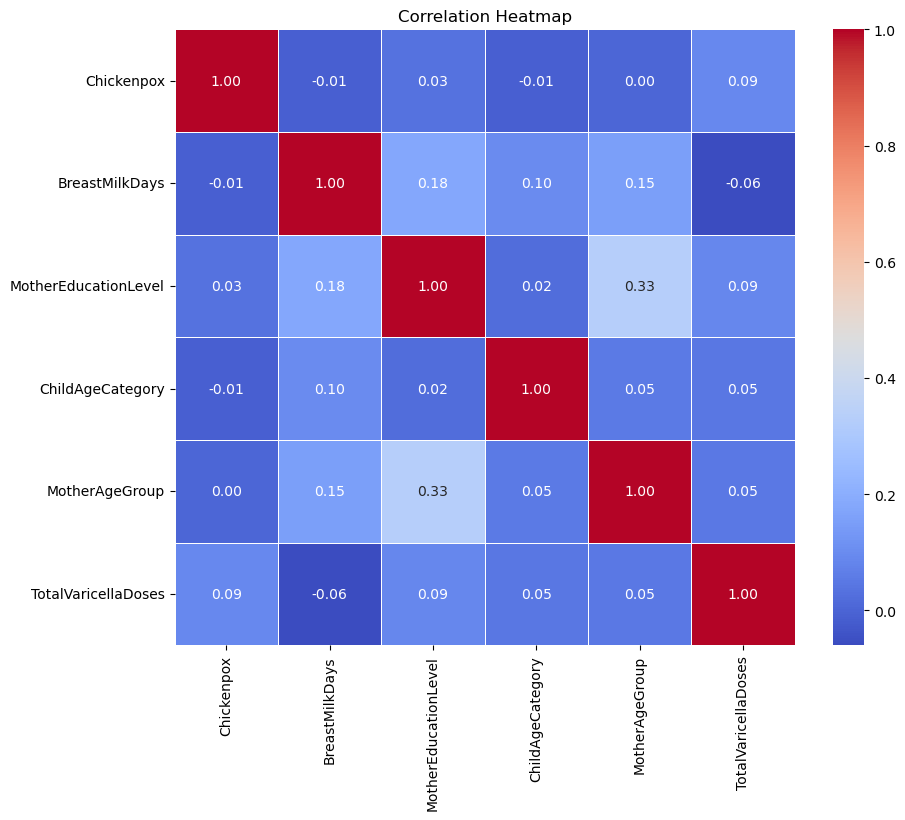

In [19]:
#Solution3 will be written in this cell

import seaborn as sns
import matplotlib.pyplot as plt

filePath = '/Users/edakocaman/Desktop/3. Grade Spring Semester/SENG352/Final/INFECTION.csv'

dataset=pd.read_csv(filePath)
dataset.replace({77: pd.NA, 99: pd.NA}, inplace=True)

columnsInterest = ['HAD_CPOX', 'BF_ENDR06', 'EDUC1', 'AGEGRP', 'M_AGEGRP2', 'P_NUMVRC']
dataset = dataset[columnsInterest].dropna()

dataset.columns = ['Chickenpox', 'BreastMilkDays', 'MotherEducationLevel', 'ChildAgeCategory', 'MotherAgeGroup', 'TotalVaricellaDoses']


correlation_matrix = data.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**QUESTION 4(15 points):**
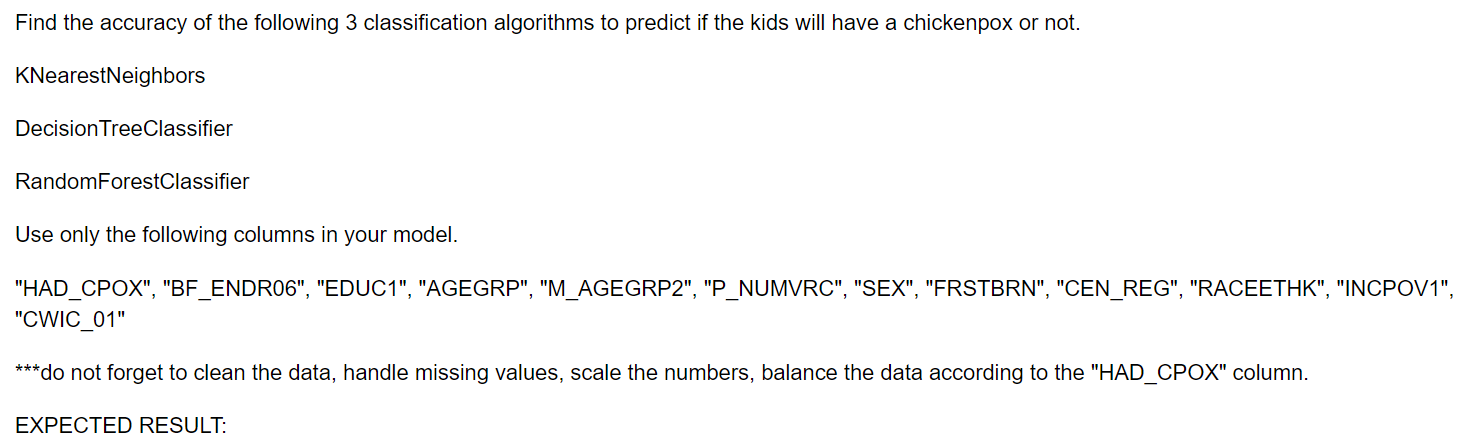
Report results should be created in a loop. 
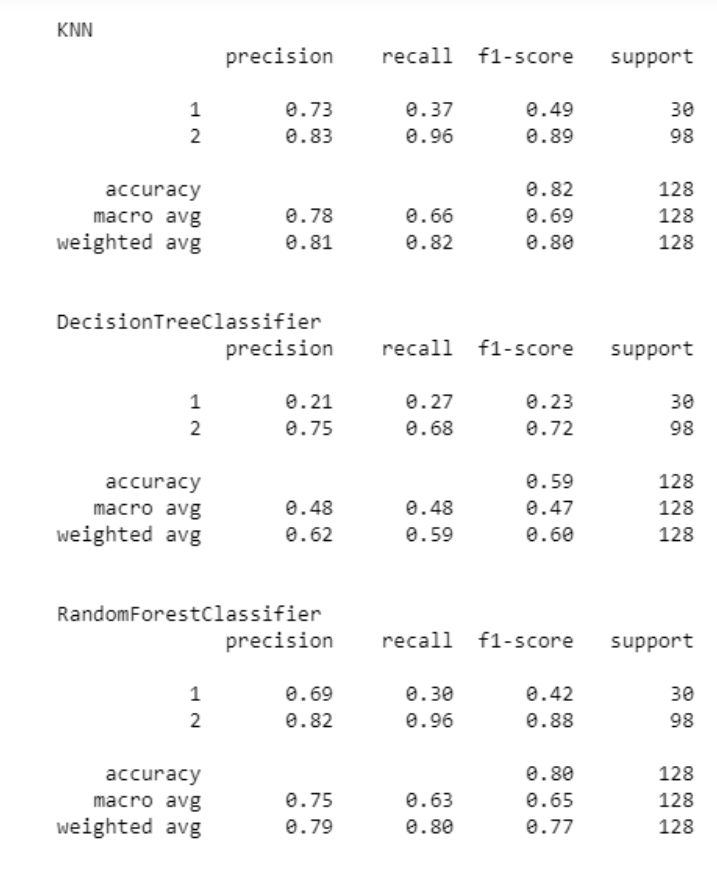



In [24]:
#Solution4 will be written in this cell

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE



filePath = '/Users/edakocaman/Desktop/3. Grade Spring Semester/SENG352/Final/INFECTION.csv'

dataset = pd.read_csv(filePath)

dataset.replace({77: pd.NA, 99: pd.NA}, inplace=True)

columnsInterest = ['HAD_CPOX', 'BF_ENDR06', 'EDUC1', 'AGEGRP', 'M_AGEGRP2', 'P_NUMVRC', 'SEX', 'FRSTBRN', 'CEN_REG', 'RACEETHK', 'INCPOV1', 'CWIC_01']
data = dataset[columnsInterest].dropna()

imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)


X = data_imputed.drop('HAD_CPOX', axis=1)
y = data_imputed['HAD_CPOX']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_scaled, y)

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

classifiers = {
    "KNearestNeighbors": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
    "RandomForestClassifier": RandomForestClassifier(random_state=42)
}

results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = report
    
    
for name, report in results.items():
    print(f"Results for {name}:\n")
    print(pd.DataFrame(report).transpose())
    print("\n")

Results for KNearestNeighbors:

              precision    recall  f1-score      support
1.0            0.925327  0.988081  0.955675  2433.000000
2.0            0.987065  0.919402  0.952033  2407.000000
accuracy       0.953926  0.953926  0.953926     0.953926
macro avg      0.956196  0.953741  0.953854  4840.000000
weighted avg   0.956030  0.953926  0.953864  4840.000000


Results for DecisionTreeClassifier:

              precision    recall  f1-score      support
1.0            0.982815  0.987259  0.985032  2433.000000
2.0            0.987062  0.982551  0.984801  2407.000000
accuracy       0.984917  0.984917  0.984917     0.984917
macro avg      0.984938  0.984905  0.984916  4840.000000
weighted avg   0.984927  0.984917  0.984917  4840.000000


Results for RandomForestClassifier:

              precision    recall  f1-score      support
1.0            0.997101  0.989725  0.993399  2433.000000
2.0            0.989691  0.997092  0.993377  2407.000000
accuracy       0.993388  0.993388  

# PART2: REGULAR EXPRESSIONS
**QUESTION 5(15 points):**

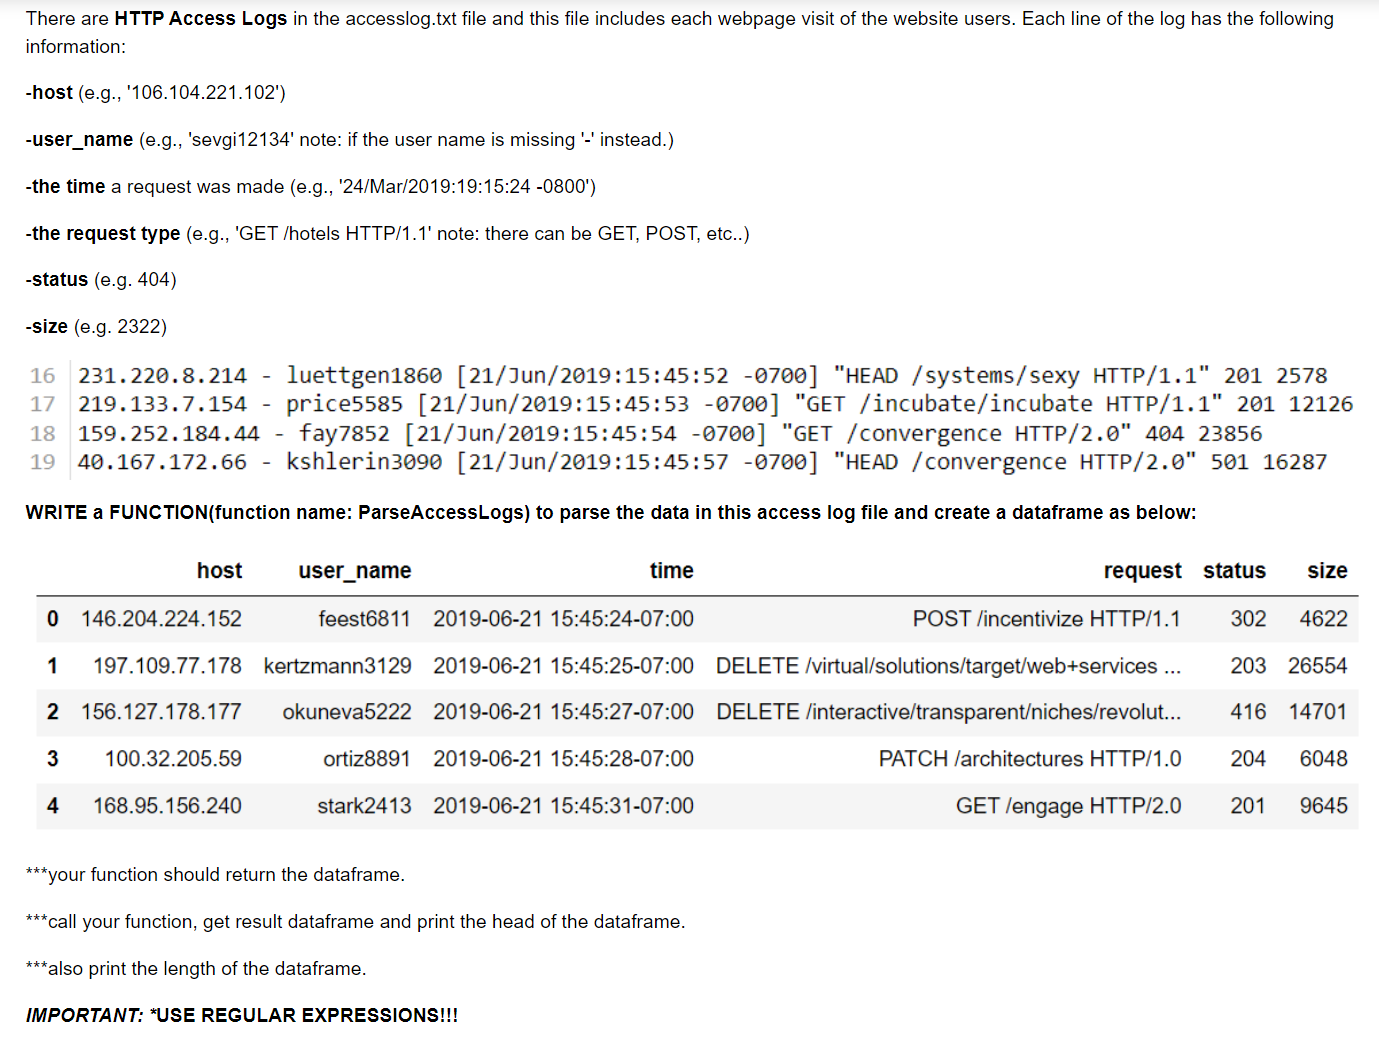

In [31]:
#Solution5 will be written in this cell
import re

def ParseAccessLogs(filePath):
    data = []
    pattern = r'(?P<host>\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}) - (?P<user_name>[\w-]+|\-) \[(?P<time>.+?)\] "(?P<request>.+?)" (?P<status>\d{3}) (?P<size>\d+)'
    
    with open(filePath, 'r') as file:
        for line in file:
            match = re.match(pattern, line)
            if match:
                host = match.group('host')
                user_name = match.group('user_name')
                time = pd.to_datetime(match.group('time'), format='%d/%b/%Y:%H:%M:%S %z')
                request = match.group('request')
                status = int(match.group('status'))
                size = int(match.group('size'))
                data.append([host, user_name, time, request, status, size])
    
    df = pd.DataFrame(data, columns=['host', 'user_name', 'time', 'request', 'status', 'size'])
    return df

accesslogDf = ParseAccessLogs('/Users/edakocaman/Desktop/3. Grade Spring Semester/SENG352/Final/accesslog.txt')
print(accesslogDf.head())

print("Length of the dataframe:", len(accesslogDf))

              host      user_name                      time  \
0  146.204.224.152      feest6811 2019-06-21 15:45:24-07:00   
1   197.109.77.178  kertzmann3129 2019-06-21 15:45:25-07:00   
2  156.127.178.177    okuneva5222 2019-06-21 15:45:27-07:00   
3    100.32.205.59      ortiz8891 2019-06-21 15:45:28-07:00   
4   168.95.156.240      stark2413 2019-06-21 15:45:31-07:00   

                                             request  status   size  
0                         POST /incentivize HTTP/1.1     302   4622  
1  DELETE /virtual/solutions/target/web+services ...     203  26554  
2  DELETE /interactive/transparent/niches/revolut...     416  14701  
3                      PATCH /architectures HTTP/1.0     204   6048  
4                               GET /engage HTTP/2.0     201   9645  
Length of the dataframe: 979


**QUESTION 6(15 points):**

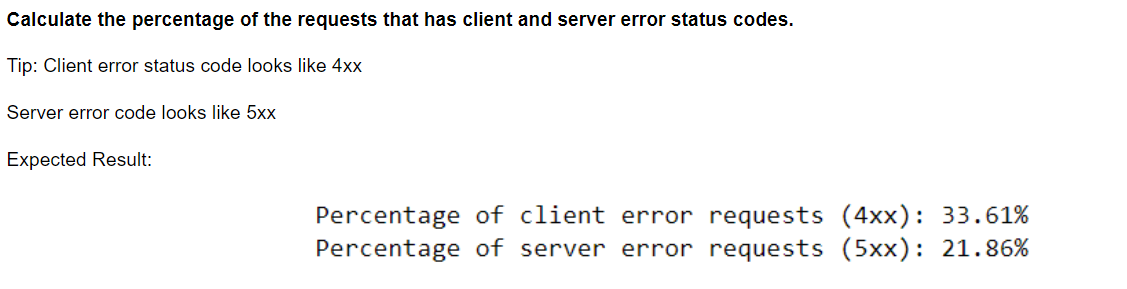

In [32]:
#Solution6 will be written in this cell

def calcErrorPercentage(df):
    clientError=df[df['status'].apply(lambda x: str(x).startswith('4'))].shape[0]
    serverError=df[df['status'].apply(lambda x: str(x).startswith('5'))].shape[0]
    
    totalRequest=df.shape[0]
    
    clientErrorPercentage = (clientError / totalRequest) * 100
    serverErrorPercentage = (serverError / totalRequest) * 100
    
    return clientErrorPercentage, serverErrorPercentage

clientErrorPercentage, serverErrorPercentage=calcErrorPercentage(accesslogDf)

print("Percentage of client error requests (4xx): {:.2f}%".format(clientErrorPercentage))
print("Percentage of server error requests (5xx): {:.2f}%".format(serverErrorPercentage))

Percentage of client error requests (4xx): 33.61%
Percentage of server error requests (5xx): 21.86%


**QUESTION7(10 points):**
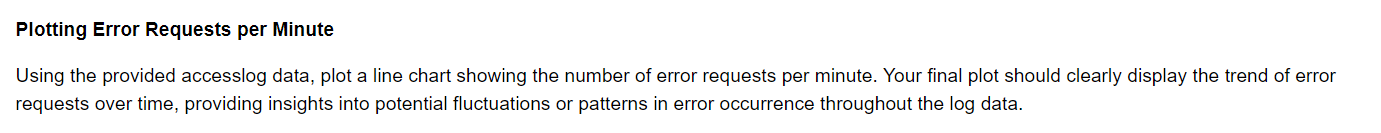

/var/folders/ml/b2d9t_yn0dx1xxmr7knkrqt00000gn/T/ipykernel_25022/433151521.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errorRequestDf['time']=pd.to_datetime(errorRequestDf['time'])


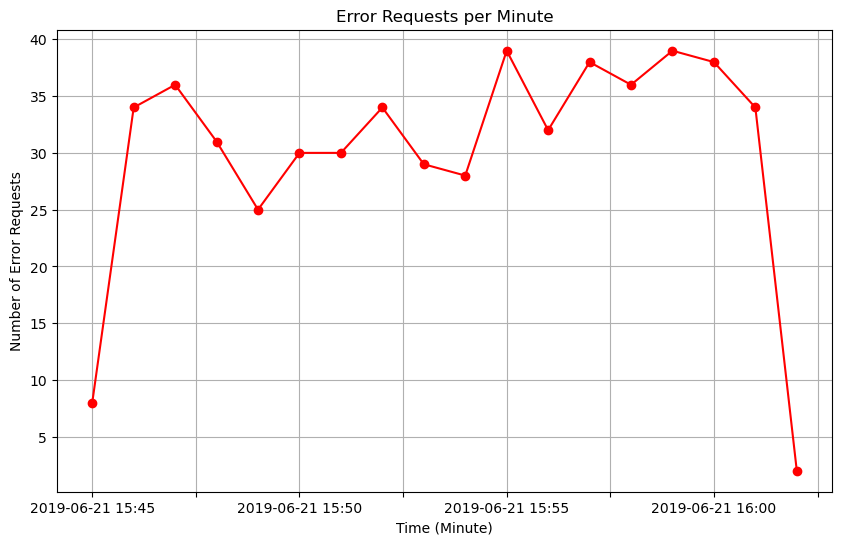

In [36]:
#Solution7 will be written in this cell

errorRequestDf=accesslogDf[accesslogDf['status'].astype(str).str.startswith(('4', '5'))]
errorRequestDf['time']=pd.to_datetime(errorRequestDf['time'])

errorRequestPerMinute = errorRequestDf.groupby(errorRequestDf['time'].dt.strftime('%Y-%m-%d %H:%M')).size()

plt.figure(figsize=(10, 6))
errorRequestPerMinute.plot(kind='line', color='red', marker='o')
plt.title('Error Requests per Minute')
plt.xlabel('Time (Minute)')
plt.ylabel('Number of Error Requests')
plt.grid(True)
plt.show()


Eda Kocaman 202028003